<a href="https://colab.research.google.com/github/url-github/machine_learning/blob/main/Titanic_Machine_Learning_from_Disaster_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/competitions/titanic/

In [ ]:
import pandas as pd
import numpy as np
np.random.seed(0)

from sklearn.model_selection import cross_val_score
import eli5

from sklearn.model_selection import train_test_split, StratifiedKFold

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
import lightgbm as lgb
import catboost as ctb

from scikitplot.estimators import plot_learning_curve

from collections import defaultdict
import helper as h

import scikitplot as skplt

import matplotlib.pyplot as plt

##### Universal

In [ ]:
df_test = pd.read_csv("input/test.csv")
df_train = pd.read_csv("input/train.csv")

df_test = df_test.fillna(-1)
df_test = df_test.drop_duplicates()

df_train = df_train.fillna(-1)
df_train = df_train.drop_duplicates()

df_all = pd.concat([df_test, df_train], axis=0)

# df_all = df_all.fillna(-1)
# df_all = df_all.drop_duplicates()

df_all.shape

(1309, 12)

In [ ]:
df_train.pivot_table(values=["Survived"], index=["Pclass","Sex"], aggfunc=np.mean)

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [ ]:
print(list(df_train.columns))

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Cabin        1309 non-null   object 
 10  Embarked     1309 non-null   object 
 11  Survived     891 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


##### Universal End

##### Trains the model and prediction: DecisionTreeClassifier (Score: 0.20334)

In [ ]:
feats = ['Pclass', 'SibSp', 'Parch']

df_train = df_all[ df_all['Survived'].notnull() ]
df_test = df_all[ df_all['Survived'].isnull() ].copy()

X_train = df_train[feats].values
y_train = df_train['Survived'].values

X_test = df_test[feats].values

In [ ]:
model = DecisionTreeClassifier(random_state=0, max_depth=5)
model.fit(X_train, y_train)
df_test['Survived'] = model.predict(X_test)

0.6936026936026937

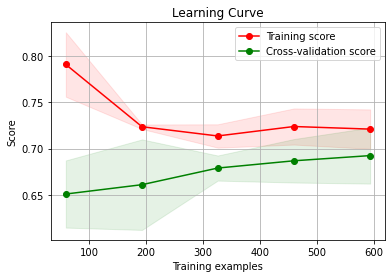

In [ ]:
plot_learning_curve(model, X_train, y_train, cv=3, random_state=0, shuffle=True);
cross_val_score(DecisionTreeClassifier(max_depth=3, random_state=0), X_train, y_train, scoring='accuracy', cv=3).mean()

In [ ]:
# !mkdir -p output
df_test[ ["PassengerId", "Survived"] ].to_csv("output/DecisionTreeClassifier.csv", index=False)

##### Trains the model and prediction: RandomForestClassifier

In [ ]:
model = RandomForestClassifier(random_state=0, max_depth=5, n_estimators=100)
model.fit(X_train, y_train)
df_test["Survived"] = model.predict(X_test)

0.6879910213243546

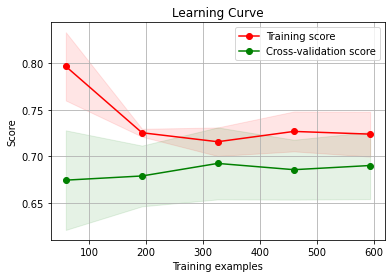

In [ ]:
plot_learning_curve(model, X_train, y_train, cv=3, random_state=0, shuffle=True);
cross_val_score(RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0), X_train, y_train, scoring='accuracy', cv=3).mean()

In [ ]:
# !mkdir -p output
df_test[ ["PassengerId", "Survived"] ].to_csv("output/RandomForestClassifier.csv", index=False)

##### Trains the model and prediction: DecisionTreeClassifier V2

In [ ]:
feats = ['Pclass', 'SibSp', 'Parch']

df_train = df_all[ df_all['Survived'].notnull() ]
df_test = df_all[ df_all['Survived'].isnull() ].copy()

X_train = df_train[feats].fillna(-1).values
y_train = df_train['Survived'].values

X_test = df_test[feats].values

In [ ]:
model = DecisionTreeClassifier(random_state=0, max_depth=5)
model.fit(X_train, y_train)
df_test['Survived'] = model.predict(X_test)

0.6936026936026937

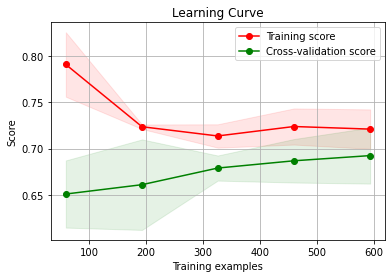

In [ ]:
plot_learning_curve(model, X_train, y_train, cv=3, random_state=0, shuffle=True);
cross_val_score(DecisionTreeClassifier(max_depth=3, random_state=0), X_train, y_train, scoring='accuracy', cv=3).mean()

##### Trains the model and prediction: XGBClassifier

In [ ]:
model = xgb.XGBClassifier(random_state=0, n_estimators=100, max_depth=3)
model.fit(X_train, y_train)
df_test['Survived'] = model.predict(X_test)

[12:27:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

[12:27:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:27:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:27:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

[12:27:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:27:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:27:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

[12:27:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:27:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:27:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

[12:27:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:27:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:27:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

[12:27:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:27:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:27:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

[12:27:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:27:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:27:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.6958473625140291

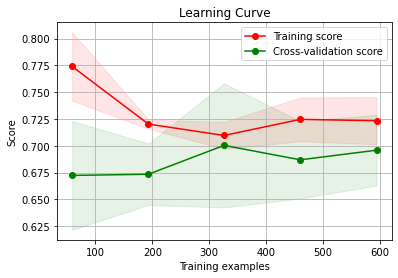

In [ ]:
plot_learning_curve(model, X_train, y_train, cv=3, random_state=0, shuffle=True);
cross_val_score(xgb.XGBClassifier(max_depth=3, random_state=0, n_estimators=100), X_train, y_train, scoring='accuracy', cv=3).mean()

##### Trains the model and prediction: LGBMClassifier

In [ ]:
model = lgb.LGBMClassifier(n_estimators=100, random_state=0, max_depth=5)
model.fit(X_train, y_train)
df_test['Survived'] = model.predict(X_test)

0.692480359147026

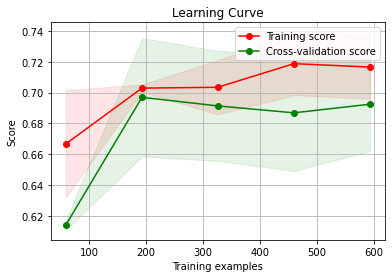

In [ ]:
plot_learning_curve(model, X_train, y_train, cv=3, random_state=0, shuffle=True);
cross_val_score(lgb.LGBMClassifier(random_state=0), X_train, y_train, scoring='accuracy', cv=3).mean()

##### Trains the model and prediction: CatBoostClassifier

In [ ]:
model = ctb.CatBoostClassifier(n_estimators=10, depth=10, verbose=False, random_state=0)
model.fit(X_train, y_train)
df_test['Survived'] = model.predict(X_test)

Learning rate set to 0.008248
0:	learn: 0.6907892	total: 775us	remaining: 775ms
1:	learn: 0.6888517	total: 1.48ms	remaining: 739ms
2:	learn: 0.6863535	total: 2.44ms	remaining: 812ms
3:	learn: 0.6835535	total: 3.27ms	remaining: 814ms
4:	learn: 0.6813273	total: 4.03ms	remaining: 802ms
5:	learn: 0.6796467	total: 4.58ms	remaining: 758ms
6:	learn: 0.6774541	total: 5.37ms	remaining: 762ms
7:	learn: 0.6753023	total: 5.97ms	remaining: 741ms
8:	learn: 0.6735412	total: 6.67ms	remaining: 734ms
9:	learn: 0.6709799	total: 7.43ms	remaining: 736ms
10:	learn: 0.6682722	total: 8.15ms	remaining: 733ms
11:	learn: 0.6664976	total: 8.81ms	remaining: 726ms
12:	learn: 0.6650221	total: 9.26ms	remaining: 703ms
13:	learn: 0.6633217	total: 9.81ms	remaining: 691ms
14:	learn: 0.6616102	total: 10.6ms	remaining: 695ms
15:	learn: 0.6594089	total: 11.3ms	remaining: 694ms
16:	learn: 0.6572834	total: 11.9ms	remaining: 691ms
17:	learn: 0.6558435	total: 12.5ms	remaining: 683ms
18:	learn: 0.6541441	total: 13.3ms	remaining:

211:	learn: 0.5389282	total: 143ms	remaining: 530ms
212:	learn: 0.5387950	total: 143ms	remaining: 529ms
213:	learn: 0.5385840	total: 144ms	remaining: 529ms
214:	learn: 0.5385211	total: 145ms	remaining: 528ms
215:	learn: 0.5384403	total: 145ms	remaining: 528ms
216:	learn: 0.5383463	total: 146ms	remaining: 527ms
217:	learn: 0.5381071	total: 147ms	remaining: 527ms
218:	learn: 0.5379015	total: 148ms	remaining: 526ms
219:	learn: 0.5377904	total: 148ms	remaining: 525ms
220:	learn: 0.5376768	total: 149ms	remaining: 524ms
221:	learn: 0.5375110	total: 149ms	remaining: 524ms
222:	learn: 0.5374396	total: 150ms	remaining: 523ms
223:	learn: 0.5373959	total: 151ms	remaining: 522ms
224:	learn: 0.5372872	total: 151ms	remaining: 522ms
225:	learn: 0.5372474	total: 152ms	remaining: 520ms
226:	learn: 0.5370630	total: 153ms	remaining: 520ms
227:	learn: 0.5369941	total: 153ms	remaining: 519ms
228:	learn: 0.5368447	total: 154ms	remaining: 518ms
229:	learn: 0.5367015	total: 155ms	remaining: 518ms
230:	learn: 

444:	learn: 0.5240998	total: 299ms	remaining: 373ms
445:	learn: 0.5240730	total: 300ms	remaining: 372ms
446:	learn: 0.5240717	total: 300ms	remaining: 372ms
447:	learn: 0.5240596	total: 301ms	remaining: 371ms
448:	learn: 0.5240350	total: 302ms	remaining: 370ms
449:	learn: 0.5240201	total: 302ms	remaining: 369ms
450:	learn: 0.5239969	total: 303ms	remaining: 369ms
451:	learn: 0.5239770	total: 304ms	remaining: 369ms
452:	learn: 0.5239613	total: 305ms	remaining: 368ms
453:	learn: 0.5239386	total: 306ms	remaining: 368ms
454:	learn: 0.5239130	total: 306ms	remaining: 367ms
455:	learn: 0.5238887	total: 307ms	remaining: 366ms
456:	learn: 0.5238614	total: 308ms	remaining: 366ms
457:	learn: 0.5238590	total: 308ms	remaining: 365ms
458:	learn: 0.5238576	total: 309ms	remaining: 364ms
459:	learn: 0.5238253	total: 309ms	remaining: 363ms
460:	learn: 0.5238088	total: 310ms	remaining: 362ms
461:	learn: 0.5237984	total: 311ms	remaining: 362ms
462:	learn: 0.5237901	total: 311ms	remaining: 361ms
463:	learn: 

683:	learn: 0.5195149	total: 456ms	remaining: 211ms
684:	learn: 0.5195057	total: 456ms	remaining: 210ms
685:	learn: 0.5194803	total: 457ms	remaining: 209ms
686:	learn: 0.5194593	total: 458ms	remaining: 209ms
687:	learn: 0.5194475	total: 459ms	remaining: 208ms
688:	learn: 0.5194246	total: 459ms	remaining: 207ms
689:	learn: 0.5194232	total: 460ms	remaining: 207ms
690:	learn: 0.5194233	total: 461ms	remaining: 206ms
691:	learn: 0.5193831	total: 461ms	remaining: 205ms
692:	learn: 0.5193595	total: 462ms	remaining: 205ms
693:	learn: 0.5193461	total: 463ms	remaining: 204ms
694:	learn: 0.5193315	total: 464ms	remaining: 203ms
695:	learn: 0.5192963	total: 464ms	remaining: 203ms
696:	learn: 0.5192809	total: 465ms	remaining: 202ms
697:	learn: 0.5192640	total: 466ms	remaining: 201ms
698:	learn: 0.5192636	total: 466ms	remaining: 201ms
699:	learn: 0.5192408	total: 467ms	remaining: 200ms
700:	learn: 0.5192408	total: 467ms	remaining: 199ms
701:	learn: 0.5192425	total: 468ms	remaining: 199ms
702:	learn: 

908:	learn: 0.5162757	total: 612ms	remaining: 61.3ms
909:	learn: 0.5162678	total: 613ms	remaining: 60.6ms
910:	learn: 0.5162429	total: 613ms	remaining: 59.9ms
911:	learn: 0.5162251	total: 614ms	remaining: 59.3ms
912:	learn: 0.5161827	total: 615ms	remaining: 58.6ms
913:	learn: 0.5161623	total: 616ms	remaining: 57.9ms
914:	learn: 0.5161558	total: 616ms	remaining: 57.3ms
915:	learn: 0.5161329	total: 617ms	remaining: 56.6ms
916:	learn: 0.5161209	total: 618ms	remaining: 55.9ms
917:	learn: 0.5161177	total: 618ms	remaining: 55.2ms
918:	learn: 0.5160836	total: 619ms	remaining: 54.6ms
919:	learn: 0.5160637	total: 620ms	remaining: 53.9ms
920:	learn: 0.5160558	total: 620ms	remaining: 53.2ms
921:	learn: 0.5160502	total: 621ms	remaining: 52.5ms
922:	learn: 0.5160459	total: 622ms	remaining: 51.9ms
923:	learn: 0.5160416	total: 622ms	remaining: 51.2ms
924:	learn: 0.5160344	total: 623ms	remaining: 50.5ms
925:	learn: 0.5160020	total: 624ms	remaining: 49.8ms
926:	learn: 0.5159882	total: 624ms	remaining: 

99:	learn: 0.6054656	total: 64.2ms	remaining: 578ms
100:	learn: 0.6051203	total: 64.9ms	remaining: 577ms
101:	learn: 0.6046696	total: 65.6ms	remaining: 578ms
102:	learn: 0.6043962	total: 66.4ms	remaining: 578ms
103:	learn: 0.6040409	total: 67ms	remaining: 577ms
104:	learn: 0.6038761	total: 67.5ms	remaining: 575ms
105:	learn: 0.6033114	total: 68.3ms	remaining: 576ms
106:	learn: 0.6029872	total: 68.8ms	remaining: 574ms
107:	learn: 0.6025624	total: 69.5ms	remaining: 574ms
108:	learn: 0.6019121	total: 70.2ms	remaining: 574ms
109:	learn: 0.6015628	total: 70.8ms	remaining: 573ms
110:	learn: 0.6009686	total: 71.6ms	remaining: 574ms
111:	learn: 0.6005058	total: 72.4ms	remaining: 574ms
112:	learn: 0.6003937	total: 73ms	remaining: 573ms
113:	learn: 0.6002068	total: 73.5ms	remaining: 571ms
114:	learn: 0.5999968	total: 74.1ms	remaining: 570ms
115:	learn: 0.5996467	total: 74.8ms	remaining: 570ms
116:	learn: 0.5994357	total: 75.9ms	remaining: 573ms
117:	learn: 0.5988016	total: 76.9ms	remaining: 575m

335:	learn: 0.5693876	total: 221ms	remaining: 436ms
336:	learn: 0.5693083	total: 221ms	remaining: 436ms
337:	learn: 0.5692925	total: 223ms	remaining: 436ms
338:	learn: 0.5692737	total: 223ms	remaining: 435ms
339:	learn: 0.5692578	total: 224ms	remaining: 434ms
340:	learn: 0.5691335	total: 224ms	remaining: 434ms
341:	learn: 0.5691104	total: 225ms	remaining: 433ms
342:	learn: 0.5689227	total: 226ms	remaining: 432ms
343:	learn: 0.5688717	total: 226ms	remaining: 432ms
344:	learn: 0.5688045	total: 227ms	remaining: 431ms
345:	learn: 0.5687844	total: 228ms	remaining: 430ms
346:	learn: 0.5686970	total: 228ms	remaining: 430ms
347:	learn: 0.5686790	total: 229ms	remaining: 429ms
348:	learn: 0.5686120	total: 230ms	remaining: 428ms
349:	learn: 0.5684866	total: 230ms	remaining: 428ms
350:	learn: 0.5684650	total: 231ms	remaining: 427ms
351:	learn: 0.5684501	total: 232ms	remaining: 427ms
352:	learn: 0.5684346	total: 232ms	remaining: 426ms
353:	learn: 0.5683669	total: 233ms	remaining: 425ms
354:	learn: 

573:	learn: 0.5615517	total: 378ms	remaining: 281ms
574:	learn: 0.5615047	total: 379ms	remaining: 280ms
575:	learn: 0.5614789	total: 380ms	remaining: 279ms
576:	learn: 0.5614242	total: 381ms	remaining: 279ms
577:	learn: 0.5614205	total: 381ms	remaining: 278ms
578:	learn: 0.5613809	total: 382ms	remaining: 278ms
579:	learn: 0.5613327	total: 383ms	remaining: 277ms
580:	learn: 0.5613029	total: 383ms	remaining: 277ms
581:	learn: 0.5612595	total: 384ms	remaining: 276ms
582:	learn: 0.5612187	total: 385ms	remaining: 275ms
583:	learn: 0.5612183	total: 386ms	remaining: 275ms
584:	learn: 0.5612147	total: 386ms	remaining: 274ms
585:	learn: 0.5612043	total: 387ms	remaining: 273ms
586:	learn: 0.5611841	total: 388ms	remaining: 273ms
587:	learn: 0.5611828	total: 388ms	remaining: 272ms
588:	learn: 0.5611822	total: 389ms	remaining: 271ms
589:	learn: 0.5611595	total: 389ms	remaining: 271ms
590:	learn: 0.5611535	total: 390ms	remaining: 270ms
591:	learn: 0.5611221	total: 391ms	remaining: 270ms
592:	learn: 

791:	learn: 0.5575700	total: 534ms	remaining: 140ms
792:	learn: 0.5575524	total: 535ms	remaining: 140ms
793:	learn: 0.5575501	total: 535ms	remaining: 139ms
794:	learn: 0.5574806	total: 536ms	remaining: 138ms
795:	learn: 0.5574636	total: 537ms	remaining: 138ms
796:	learn: 0.5574639	total: 537ms	remaining: 137ms
797:	learn: 0.5574495	total: 538ms	remaining: 136ms
798:	learn: 0.5573980	total: 539ms	remaining: 136ms
799:	learn: 0.5573548	total: 539ms	remaining: 135ms
800:	learn: 0.5573290	total: 540ms	remaining: 134ms
801:	learn: 0.5573225	total: 541ms	remaining: 134ms
802:	learn: 0.5573123	total: 541ms	remaining: 133ms
803:	learn: 0.5572937	total: 542ms	remaining: 132ms
804:	learn: 0.5572669	total: 543ms	remaining: 131ms
805:	learn: 0.5572673	total: 543ms	remaining: 131ms
806:	learn: 0.5572240	total: 544ms	remaining: 130ms
807:	learn: 0.5571972	total: 544ms	remaining: 129ms
808:	learn: 0.5571821	total: 545ms	remaining: 129ms
809:	learn: 0.5571835	total: 546ms	remaining: 128ms
810:	learn: 

0:	learn: 0.6916337	total: 873us	remaining: 872ms
1:	learn: 0.6904570	total: 1.65ms	remaining: 824ms
2:	learn: 0.6889487	total: 2.31ms	remaining: 770ms
3:	learn: 0.6873898	total: 3.04ms	remaining: 756ms
4:	learn: 0.6862681	total: 3.75ms	remaining: 746ms
5:	learn: 0.6850606	total: 4.36ms	remaining: 722ms
6:	learn: 0.6835883	total: 5.23ms	remaining: 742ms
7:	learn: 0.6822358	total: 5.98ms	remaining: 742ms
8:	learn: 0.6809101	total: 6.73ms	remaining: 741ms
9:	learn: 0.6796708	total: 7.34ms	remaining: 727ms
10:	learn: 0.6782747	total: 8.06ms	remaining: 725ms
11:	learn: 0.6770589	total: 8.97ms	remaining: 738ms
12:	learn: 0.6758597	total: 9.85ms	remaining: 748ms
13:	learn: 0.6749049	total: 10.5ms	remaining: 736ms
14:	learn: 0.6742359	total: 11ms	remaining: 725ms
15:	learn: 0.6728502	total: 11.8ms	remaining: 727ms
16:	learn: 0.6717089	total: 12.6ms	remaining: 729ms
17:	learn: 0.6705576	total: 13.4ms	remaining: 731ms
18:	learn: 0.6696778	total: 14.1ms	remaining: 727ms
19:	learn: 0.6685352	tota

226:	learn: 0.5960284	total: 152ms	remaining: 518ms
227:	learn: 0.5959763	total: 153ms	remaining: 517ms
228:	learn: 0.5958108	total: 154ms	remaining: 517ms
229:	learn: 0.5957965	total: 154ms	remaining: 516ms
230:	learn: 0.5956693	total: 155ms	remaining: 516ms
231:	learn: 0.5955731	total: 156ms	remaining: 516ms
232:	learn: 0.5954690	total: 157ms	remaining: 515ms
233:	learn: 0.5952235	total: 157ms	remaining: 515ms
234:	learn: 0.5952068	total: 158ms	remaining: 513ms
235:	learn: 0.5951558	total: 158ms	remaining: 513ms
236:	learn: 0.5949408	total: 159ms	remaining: 512ms
237:	learn: 0.5948624	total: 160ms	remaining: 512ms
238:	learn: 0.5948457	total: 160ms	remaining: 510ms
239:	learn: 0.5947839	total: 161ms	remaining: 511ms
240:	learn: 0.5946730	total: 162ms	remaining: 510ms
241:	learn: 0.5946247	total: 163ms	remaining: 510ms
242:	learn: 0.5945891	total: 163ms	remaining: 509ms
243:	learn: 0.5945329	total: 164ms	remaining: 508ms
244:	learn: 0.5945110	total: 165ms	remaining: 507ms
245:	learn: 

432:	learn: 0.5858367	total: 303ms	remaining: 397ms
433:	learn: 0.5857998	total: 304ms	remaining: 396ms
434:	learn: 0.5857731	total: 304ms	remaining: 395ms
435:	learn: 0.5857548	total: 305ms	remaining: 394ms
436:	learn: 0.5857423	total: 306ms	remaining: 394ms
437:	learn: 0.5856692	total: 307ms	remaining: 393ms
438:	learn: 0.5856499	total: 307ms	remaining: 392ms
439:	learn: 0.5855978	total: 308ms	remaining: 392ms
440:	learn: 0.5855947	total: 308ms	remaining: 391ms
441:	learn: 0.5855081	total: 309ms	remaining: 390ms
442:	learn: 0.5854468	total: 310ms	remaining: 390ms
443:	learn: 0.5854329	total: 310ms	remaining: 389ms
444:	learn: 0.5854108	total: 311ms	remaining: 388ms
445:	learn: 0.5853813	total: 312ms	remaining: 388ms
446:	learn: 0.5853548	total: 313ms	remaining: 387ms
447:	learn: 0.5853264	total: 313ms	remaining: 386ms
448:	learn: 0.5853204	total: 314ms	remaining: 385ms
449:	learn: 0.5853188	total: 315ms	remaining: 385ms
450:	learn: 0.5853160	total: 315ms	remaining: 384ms
451:	learn: 

638:	learn: 0.5812877	total: 456ms	remaining: 258ms
639:	learn: 0.5812554	total: 457ms	remaining: 257ms
640:	learn: 0.5812500	total: 457ms	remaining: 256ms
641:	learn: 0.5812496	total: 458ms	remaining: 255ms
642:	learn: 0.5812493	total: 459ms	remaining: 255ms
643:	learn: 0.5812435	total: 460ms	remaining: 254ms
644:	learn: 0.5812409	total: 460ms	remaining: 253ms
645:	learn: 0.5812090	total: 461ms	remaining: 253ms
646:	learn: 0.5812080	total: 461ms	remaining: 252ms
647:	learn: 0.5811986	total: 462ms	remaining: 251ms
648:	learn: 0.5811983	total: 462ms	remaining: 250ms
649:	learn: 0.5811400	total: 463ms	remaining: 249ms
650:	learn: 0.5811287	total: 464ms	remaining: 249ms
651:	learn: 0.5810907	total: 464ms	remaining: 248ms
652:	learn: 0.5810717	total: 465ms	remaining: 247ms
653:	learn: 0.5810635	total: 466ms	remaining: 246ms
654:	learn: 0.5810573	total: 466ms	remaining: 246ms
655:	learn: 0.5810096	total: 467ms	remaining: 245ms
656:	learn: 0.5810030	total: 468ms	remaining: 244ms
657:	learn: 

834:	learn: 0.5779478	total: 606ms	remaining: 120ms
835:	learn: 0.5779431	total: 607ms	remaining: 119ms
836:	learn: 0.5779339	total: 608ms	remaining: 118ms
837:	learn: 0.5779140	total: 609ms	remaining: 118ms
838:	learn: 0.5779040	total: 610ms	remaining: 117ms
839:	learn: 0.5778690	total: 611ms	remaining: 116ms
840:	learn: 0.5778497	total: 612ms	remaining: 116ms
841:	learn: 0.5778491	total: 612ms	remaining: 115ms
842:	learn: 0.5778276	total: 613ms	remaining: 114ms
843:	learn: 0.5778211	total: 614ms	remaining: 113ms
844:	learn: 0.5778215	total: 614ms	remaining: 113ms
845:	learn: 0.5778145	total: 615ms	remaining: 112ms
846:	learn: 0.5778111	total: 616ms	remaining: 111ms
847:	learn: 0.5778070	total: 617ms	remaining: 111ms
848:	learn: 0.5777994	total: 617ms	remaining: 110ms
849:	learn: 0.5777997	total: 618ms	remaining: 109ms
850:	learn: 0.5777614	total: 618ms	remaining: 108ms
851:	learn: 0.5777486	total: 619ms	remaining: 108ms
852:	learn: 0.5777234	total: 620ms	remaining: 107ms
853:	learn: 

0.6992143658810326

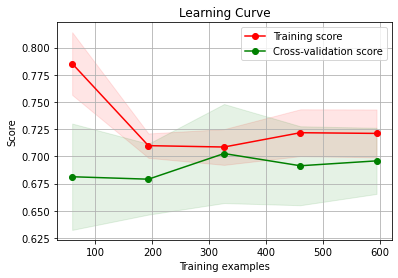

In [ ]:
plot_learning_curve(model, X_train, y_train, cv=3, random_state=0, shuffle=True);
cross_val_score(ctb.CatBoostClassifier(random_state=0), X_train, y_train, scoring='accuracy', cv=3).mean()

##### Trains the model and prediction: DecisionTreeClassifier V2

In [ ]:
def check_missing(df):
    for column in df.columns:
        missing = column, df[column].isnull().sum()
        if missing[1] == 0: continue
        print(missing)

In [ ]:
check_missing(df_all)

('Age', 263)
('Fare', 1)
('Cabin', 1014)
('Embarked', 2)
('Survived', 418)


In [ ]:
# df_all = df_all.fillna(-1)

In [ ]:
print(list(df_all.columns))

['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived']


In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Survived     891 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [ ]:
# def funfeat(df, par1, par2):
#     df['{0}&{1}'.format(par1, par2)] = df[par1].map(str) + '&' + df[par2].map(str)
#     df['{0}&{1}_cat'.format(par1, par2)] = df['{0}&{1}'.format(par1, par2)].factorize()[0]

In [ ]:
def funfeat(df_all, par1):
    df_all['{0}_cat'.format(par1)] = df_all['{0}'.format(par1)].factorize()[0]

In [ ]:
funfeat(df_all, 'Sex')
funfeat(df_all, 'Ticket')
funfeat(df_all, 'Cabin')

In [ ]:
df_all.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Sex_cat,Ticket_cat,Cabin_cat
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN,0,0,-1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN,1,1,-1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN,0,2,-1


In [ ]:
feats = ['Pclass', 'SibSp', 'Parch', 'Sex_cat', 'Ticket_cat', 'Cabin_cat']

df_train = df_all[ df_all['Survived'].notnull() ]
df_test = df_all[ df_all['Survived'].isnull() ].copy()

X_train = df_train[feats].values
y_train = df_train['Survived'].values

X_test = df_test[feats].values

In [ ]:
model = DecisionTreeClassifier(random_state=0, max_depth=5)
model.fit(X_train, y_train)
df_test['Survived'] = model.predict(X_test)

0.7957351290684623

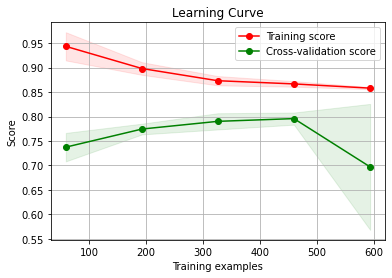

In [ ]:
plot_learning_curve(model, X_train, y_train, cv=3, random_state=0, shuffle=True);
cross_val_score(DecisionTreeClassifier(max_depth=3, random_state=0), X_train, y_train, scoring='accuracy', cv=3).mean()

In [ ]:
df_test[ ["PassengerId", "Survived"] ].to_csv("output/DecisionTreeClassifier_v2.csv", index=False)

In [ ]:
def run_model(model, X_train, feats, scoring="accuracy", cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True)):
#     df = feature_engineering(df)

    X_train = df_train[feats].values
    y_train = df_train['Survived'].values

    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring=scoring)
    print(np.mean(scores), np.std(scores))

    skplt.estimators.plot_learning_curve(model, X_train, y_train, cv=cv, scoring=scoring, figsize=(15, 5));

    fig = plt.figure(figsize=(15,6))
    ax1 = fig.add_subplot(122)

    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_train)
    skplt.metrics.plot_roc(y_train, y_pred_proba, ax=ax1)

    skplt.estimators.plot_feature_importances(model, feature_names=feats, x_tick_rotation=90, figsize=(15, 5))
    return eli5.show_weights(model, feature_names=feats)

0.7901234567901234 0.010408101566212915


Weight,Feature
0.6684,Sex_cat
0.1674,Pclass
0.1070,Cabin_cat
0.0327,Ticket_cat
0.0246,SibSp
0,Parch


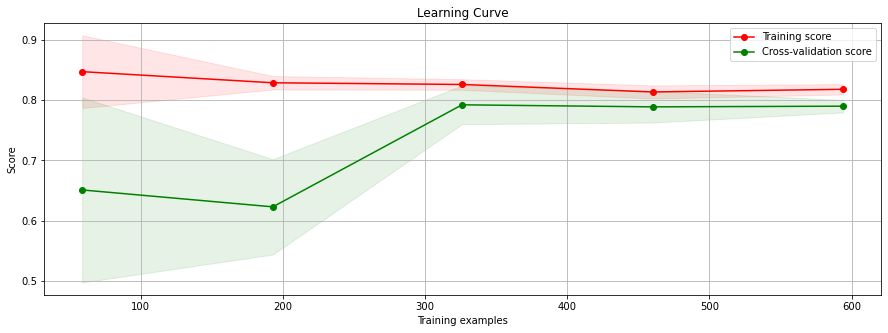

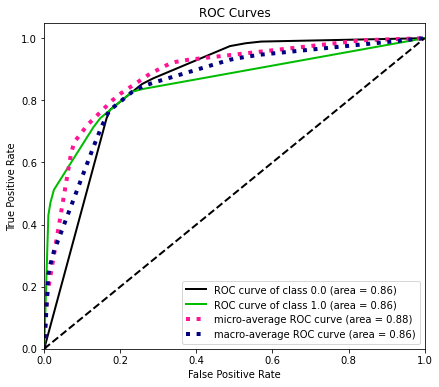

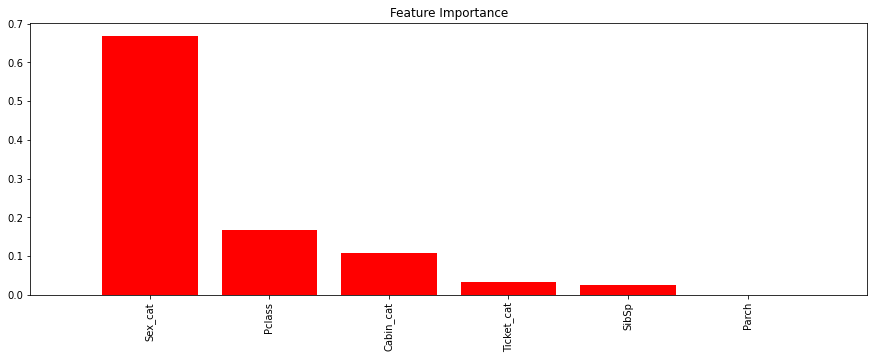

In [ ]:
run_model(DecisionTreeClassifier(max_depth=3, random_state=0), X_train, feats)

##### Trains the model and prediction: DecisionTreeClassifier V3 (Score: 0.26555)

Your Best Entry!
Your submission scored 0.26555, which is not an improvement of your previous score. Keep trying!

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Cabin        1309 non-null   object 
 10  Embarked     1309 non-null   object 
 11  Survived     891 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [ ]:
df_all['name_short'] = df_all['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
df_all['name_short'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Ms                2
Major             2
Mlle              2
Sir               1
the Countess      1
Capt              1
Don               1
Lady              1
Mme               1
Dona              1
Jonkheer          1
Name: name_short, dtype: int64

In [ ]:
name_top = list(df_all['name_short'].value_counts().head(6).keys())

name_count = defaultdict(lambda: 'other', dict(zip(name2_top, name2_top)))
df_all['name_count'] = df_all['name_short'].map(name_count)
df_all['name_count'].value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
other      18
Rev         8
Dr          8
Name: name_count, dtype: int64

In [ ]:
def funfeat(df_all, par1):
    df_all['{0}_cat'.format(par1)] = df_all['{0}'.format(par1)].factorize()[0]

In [ ]:
funfeat(df_all, 'Sex')
funfeat(df_all, 'name_count')

In [ ]:
df_all.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,name_short,name_count,Sex_cat,name_count_cat
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,-1,Q,NaN,Mr,Mr,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,-1,S,NaN,Mrs,Mrs,1,1


In [ ]:
feats = ['Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'Sex_cat', 'name_count_cat']

df_train = df_all[ df_all['Survived'].notnull() ]
df_test = df_all[ df_all['Survived'].isnull() ].copy()

X_train = df_train[feats].fillna(-1).values
y_train = df_train['Survived'].values

X_test = df_test[feats].values

In [ ]:
model = DecisionTreeClassifier(random_state=0, max_depth=5)
model.fit(X_train, y_train)
df_test['Survived'] = model.predict(X_test)

0.8114478114478115

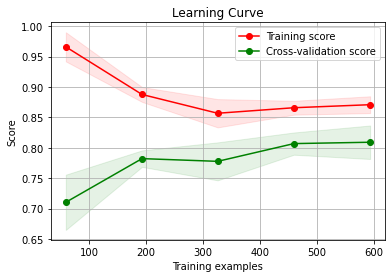

In [ ]:
plot_learning_curve(model, X_train, y_train, cv=3, random_state=0, shuffle=True);
cross_val_score(DecisionTreeClassifier(max_depth=3, random_state=0), X_train, y_train, scoring='accuracy', cv=3).mean()

In [ ]:
df_test[ ["PassengerId", "Survived"] ].to_csv("output/DecisionTreeClassifier_v3.csv", index=False)

##### Trains the model and prediction: DecisionTreeClassifier V4

In [ ]:
dict_mean_age_by_name = df_all.groupby('name_count').agg(np.mean)['Age'].to_dict()
dict_mean_age_by_name

{'Dr': 38.0,
 'Master': 4.632459016393442,
 'Miss': 17.394576923076922,
 'Mr': 24.52113606340819,
 'Mrs': 31.78680203045685,
 'Rev': 41.25,
 'other': 40.5}

In [ ]:
dict_median_age_by_name = df_all.groupby('name_count').agg(np.median)['Age'].to_dict()
dict_median_age_by_name

{'Dr': 46.5,
 'Master': 4.0,
 'Miss': 18.0,
 'Mr': 25.0,
 'Mrs': 33.0,
 'Rev': 41.5,
 'other': 42.5}

In [ ]:
df_all['age_mean'] = df_all.name_count.map(dict_mean_age_by_name)
df_all['age_median'] = df_all.name_count.map(dict_median_age_by_name)

In [ ]:
df_all['family_size']   = df_all['SibSp'] + df_all['Parch'] + 1
df_all['family_single'] = df_all['family_size'] == 1
df_all['family_small']  = (df_all['family_size'] > 1) & (df_all['family_size'] < 5)
df_all['family_big']  = df_all['family_size'] > 4

df_all['child'] = df_all['age_mean'] < 18
df_all['adult'] = df_all['age_mean'] >= 18

def is_mother(row):
    if row['Sex'] == 'male': return False
    if row['name_count'] == 'miss': return False
    if row['age_mean'] < 18: return False
    
    return True

df_all['is_mother'] = df_all.apply(is_mother, axis=1)
print(df_all['is_mother'].value_counts())

False    1103
True      206
Name: is_mother, dtype: int64


In [ ]:
feats = ['Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'Sex_cat', 'name_count_cat',
        'age_mean', 'age_median', 'is_mother']

df_train = df_all[ df_all['Survived'].notnull() ]
df_test = df_all[ df_all['Survived'].isnull() ].copy()

X_train = df_train[feats].fillna(-1).values
y_train = df_train['Survived'].values

X_test = df_test[feats].values

In [ ]:
model = DecisionTreeClassifier(random_state=0, max_depth=5)
model.fit(X_train, y_train)
df_test['Survived'] = model.predict(X_test)

0.8148148148148149

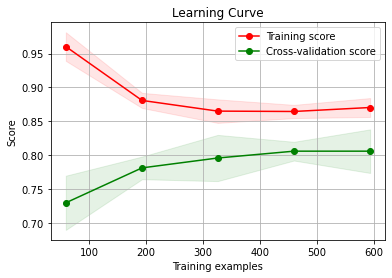

In [ ]:
plot_learning_curve(model, X_train, y_train, cv=3, random_state=0, shuffle=True);
cross_val_score(DecisionTreeClassifier(max_depth=3, random_state=0), X_train, y_train, scoring='accuracy', cv=3).mean()

##### Trains the model and prediction: XGBClassifier (Score: 0.24880)

In [ ]:
model = xgb.XGBClassifier(random_state=0, n_estimators=100, max_depth=3)
model.fit(X_train, y_train)
df_test['Survived'] = model.predict(X_test)

[14:41:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

[14:41:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:41:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:41:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

[14:41:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:41:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:41:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

[14:41:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:41:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:41:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

[14:41:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:41:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:41:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

[14:41:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:41:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:41:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

[14:41:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:41:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:41:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8327721661054994

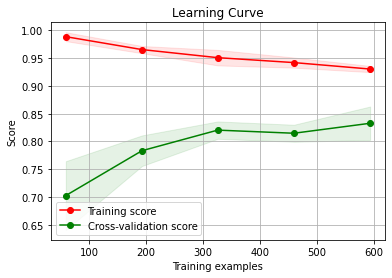

In [ ]:
plot_learning_curve(model, X_train, y_train, cv=3, random_state=0, shuffle=True);
cross_val_score(xgb.XGBClassifier(max_depth=5, random_state=0, n_estimators=150), X_train, y_train, scoring='accuracy', cv=3).mean()

In [ ]:
df_test[ ["PassengerId", "Survived"] ].to_csv("output/XGBClassifier.csv", index=False)

In [ ]:
model = lgb.LGBMClassifier(n_estimators=100, random_state=0, max_depth=5)
model.fit(X_train, y_train)
df_test['Survived'] = model.predict(X_test)

0.8260381593714926

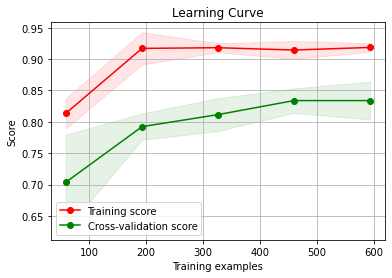

In [ ]:
plot_learning_curve(model, X_train, y_train, cv=3, random_state=0, shuffle=True);
cross_val_score(lgb.LGBMClassifier(random_state=0), X_train, y_train, scoring='accuracy', cv=3).mean()

In [ ]:
model = ctb.CatBoostClassifier(n_estimators=10, depth=10, verbose=False, random_state=0)
model.fit(X_train, y_train)
df_test['Survived'] = model.predict(X_test)

Learning rate set to 0.008248
0:	learn: 0.6868892	total: 1.51ms	remaining: 1.51s
1:	learn: 0.6810867	total: 2.83ms	remaining: 1.41s
2:	learn: 0.6758070	total: 3.57ms	remaining: 1.19s
3:	learn: 0.6700430	total: 4.74ms	remaining: 1.18s
4:	learn: 0.6646516	total: 5.91ms	remaining: 1.18s
5:	learn: 0.6593636	total: 7.2ms	remaining: 1.19s
6:	learn: 0.6547018	total: 8.78ms	remaining: 1.25s
7:	learn: 0.6495014	total: 10.3ms	remaining: 1.27s
8:	learn: 0.6445812	total: 11.8ms	remaining: 1.3s
9:	learn: 0.6399109	total: 13.2ms	remaining: 1.31s
10:	learn: 0.6359426	total: 13.9ms	remaining: 1.25s
11:	learn: 0.6308760	total: 15.2ms	remaining: 1.25s
12:	learn: 0.6265235	total: 16.4ms	remaining: 1.24s
13:	learn: 0.6215599	total: 17.7ms	remaining: 1.25s
14:	learn: 0.6164407	total: 19.1ms	remaining: 1.25s
15:	learn: 0.6116303	total: 20.4ms	remaining: 1.25s
16:	learn: 0.6071350	total: 21.2ms	remaining: 1.23s
17:	learn: 0.6030670	total: 23.1ms	remaining: 1.26s
18:	learn: 0.5987989	total: 24.5ms	remaining: 

242:	learn: 0.3460534	total: 325ms	remaining: 1.01s
243:	learn: 0.3458578	total: 327ms	remaining: 1.01s
244:	learn: 0.3455886	total: 329ms	remaining: 1.01s
245:	learn: 0.3453706	total: 330ms	remaining: 1.01s
246:	learn: 0.3450200	total: 331ms	remaining: 1.01s
247:	learn: 0.3447733	total: 332ms	remaining: 1.01s
248:	learn: 0.3445378	total: 334ms	remaining: 1.01s
249:	learn: 0.3442102	total: 335ms	remaining: 1s
250:	learn: 0.3435821	total: 336ms	remaining: 1s
251:	learn: 0.3431369	total: 337ms	remaining: 1s
252:	learn: 0.3428938	total: 339ms	remaining: 1000ms
253:	learn: 0.3426932	total: 340ms	remaining: 999ms
254:	learn: 0.3424772	total: 349ms	remaining: 1.02s
255:	learn: 0.3421994	total: 350ms	remaining: 1.02s
256:	learn: 0.3419787	total: 352ms	remaining: 1.02s
257:	learn: 0.3416228	total: 354ms	remaining: 1.02s
258:	learn: 0.3412156	total: 355ms	remaining: 1.02s
259:	learn: 0.3410156	total: 357ms	remaining: 1.02s
260:	learn: 0.3406688	total: 359ms	remaining: 1.01s
261:	learn: 0.340562

500:	learn: 0.3045593	total: 656ms	remaining: 653ms
501:	learn: 0.3045470	total: 657ms	remaining: 651ms
502:	learn: 0.3044454	total: 658ms	remaining: 650ms
503:	learn: 0.3042919	total: 659ms	remaining: 649ms
504:	learn: 0.3042036	total: 660ms	remaining: 647ms
505:	learn: 0.3041722	total: 662ms	remaining: 646ms
506:	learn: 0.3040514	total: 663ms	remaining: 644ms
507:	learn: 0.3038785	total: 664ms	remaining: 643ms
508:	learn: 0.3038000	total: 665ms	remaining: 642ms
509:	learn: 0.3036827	total: 667ms	remaining: 641ms
510:	learn: 0.3035608	total: 668ms	remaining: 639ms
511:	learn: 0.3034838	total: 669ms	remaining: 638ms
512:	learn: 0.3033394	total: 670ms	remaining: 636ms
513:	learn: 0.3032586	total: 672ms	remaining: 635ms
514:	learn: 0.3032447	total: 672ms	remaining: 633ms
515:	learn: 0.3028881	total: 674ms	remaining: 632ms
516:	learn: 0.3027306	total: 675ms	remaining: 631ms
517:	learn: 0.3026398	total: 676ms	remaining: 629ms
518:	learn: 0.3024251	total: 678ms	remaining: 628ms
519:	learn: 

777:	learn: 0.2739259	total: 988ms	remaining: 282ms
778:	learn: 0.2738743	total: 989ms	remaining: 281ms
779:	learn: 0.2738190	total: 991ms	remaining: 279ms
780:	learn: 0.2737112	total: 992ms	remaining: 278ms
781:	learn: 0.2736358	total: 993ms	remaining: 277ms
782:	learn: 0.2734598	total: 994ms	remaining: 275ms
783:	learn: 0.2732296	total: 995ms	remaining: 274ms
784:	learn: 0.2730222	total: 996ms	remaining: 273ms
785:	learn: 0.2727633	total: 997ms	remaining: 272ms
786:	learn: 0.2727473	total: 998ms	remaining: 270ms
787:	learn: 0.2726413	total: 999ms	remaining: 269ms
788:	learn: 0.2725991	total: 1s	remaining: 268ms
789:	learn: 0.2724876	total: 1s	remaining: 266ms
790:	learn: 0.2724191	total: 1s	remaining: 265ms
791:	learn: 0.2723748	total: 1s	remaining: 264ms
792:	learn: 0.2722674	total: 1s	remaining: 263ms
793:	learn: 0.2721865	total: 1.01s	remaining: 261ms
794:	learn: 0.2721198	total: 1.01s	remaining: 260ms
795:	learn: 0.2720580	total: 1.01s	remaining: 259ms
796:	learn: 0.2718916	total

Learning rate set to 0.008248
0:	learn: 0.6877327	total: 1.15ms	remaining: 1.15s
1:	learn: 0.6831493	total: 3.28ms	remaining: 1.64s
2:	learn: 0.6773878	total: 4.47ms	remaining: 1.49s
3:	learn: 0.6727876	total: 5.41ms	remaining: 1.35s
4:	learn: 0.6682122	total: 6.64ms	remaining: 1.32s
5:	learn: 0.6636027	total: 7.88ms	remaining: 1.3s
6:	learn: 0.6591606	total: 9.36ms	remaining: 1.33s
7:	learn: 0.6538131	total: 10.8ms	remaining: 1.34s
8:	learn: 0.6493379	total: 12.1ms	remaining: 1.34s
9:	learn: 0.6456242	total: 13ms	remaining: 1.29s
10:	learn: 0.6417134	total: 13.6ms	remaining: 1.23s
11:	learn: 0.6376332	total: 15.1ms	remaining: 1.24s
12:	learn: 0.6326415	total: 16.6ms	remaining: 1.26s
13:	learn: 0.6287728	total: 17.9ms	remaining: 1.26s
14:	learn: 0.6244583	total: 19.1ms	remaining: 1.25s
15:	learn: 0.6194110	total: 20.4ms	remaining: 1.25s
16:	learn: 0.6151409	total: 21.9ms	remaining: 1.26s
17:	learn: 0.6107632	total: 23.1ms	remaining: 1.26s
18:	learn: 0.6069354	total: 24.8ms	remaining: 1

270:	learn: 0.3706947	total: 328ms	remaining: 883ms
271:	learn: 0.3706356	total: 330ms	remaining: 882ms
272:	learn: 0.3705462	total: 331ms	remaining: 882ms
273:	learn: 0.3701720	total: 332ms	remaining: 881ms
274:	learn: 0.3697980	total: 334ms	remaining: 880ms
275:	learn: 0.3695438	total: 335ms	remaining: 879ms
276:	learn: 0.3693944	total: 336ms	remaining: 877ms
277:	learn: 0.3692954	total: 337ms	remaining: 875ms
278:	learn: 0.3691576	total: 338ms	remaining: 874ms
279:	learn: 0.3688740	total: 340ms	remaining: 873ms
280:	learn: 0.3688653	total: 340ms	remaining: 870ms
281:	learn: 0.3686716	total: 342ms	remaining: 870ms
282:	learn: 0.3685270	total: 343ms	remaining: 869ms
283:	learn: 0.3681703	total: 345ms	remaining: 870ms
284:	learn: 0.3679780	total: 347ms	remaining: 870ms
285:	learn: 0.3676749	total: 348ms	remaining: 869ms
286:	learn: 0.3674158	total: 349ms	remaining: 868ms
287:	learn: 0.3672910	total: 351ms	remaining: 868ms
288:	learn: 0.3671470	total: 352ms	remaining: 867ms
289:	learn: 

546:	learn: 0.3343092	total: 660ms	remaining: 547ms
547:	learn: 0.3342531	total: 662ms	remaining: 546ms
548:	learn: 0.3342016	total: 663ms	remaining: 545ms
549:	learn: 0.3340019	total: 664ms	remaining: 543ms
550:	learn: 0.3338878	total: 666ms	remaining: 542ms
551:	learn: 0.3338015	total: 667ms	remaining: 541ms
552:	learn: 0.3335785	total: 668ms	remaining: 540ms
553:	learn: 0.3334903	total: 669ms	remaining: 539ms
554:	learn: 0.3333740	total: 671ms	remaining: 538ms
555:	learn: 0.3333694	total: 671ms	remaining: 536ms
556:	learn: 0.3332212	total: 673ms	remaining: 535ms
557:	learn: 0.3331285	total: 674ms	remaining: 534ms
558:	learn: 0.3329670	total: 675ms	remaining: 533ms
559:	learn: 0.3329294	total: 676ms	remaining: 531ms
560:	learn: 0.3328185	total: 677ms	remaining: 530ms
561:	learn: 0.3327805	total: 678ms	remaining: 529ms
562:	learn: 0.3326823	total: 680ms	remaining: 528ms
563:	learn: 0.3325655	total: 681ms	remaining: 526ms
564:	learn: 0.3325446	total: 682ms	remaining: 525ms
565:	learn: 

816:	learn: 0.3074843	total: 992ms	remaining: 222ms
817:	learn: 0.3074049	total: 994ms	remaining: 221ms
818:	learn: 0.3072956	total: 995ms	remaining: 220ms
819:	learn: 0.3072536	total: 997ms	remaining: 219ms
820:	learn: 0.3071356	total: 998ms	remaining: 218ms
821:	learn: 0.3070042	total: 999ms	remaining: 216ms
822:	learn: 0.3069587	total: 1s	remaining: 215ms
823:	learn: 0.3069121	total: 1s	remaining: 214ms
824:	learn: 0.3068098	total: 1s	remaining: 213ms
825:	learn: 0.3067443	total: 1s	remaining: 211ms
826:	learn: 0.3067237	total: 1s	remaining: 210ms
827:	learn: 0.3065596	total: 1.01s	remaining: 209ms
828:	learn: 0.3064794	total: 1.01s	remaining: 208ms
829:	learn: 0.3062495	total: 1.01s	remaining: 207ms
830:	learn: 0.3062033	total: 1.01s	remaining: 206ms
831:	learn: 0.3060897	total: 1.01s	remaining: 204ms
832:	learn: 0.3059940	total: 1.01s	remaining: 203ms
833:	learn: 0.3058885	total: 1.01s	remaining: 202ms
834:	learn: 0.3057183	total: 1.02s	remaining: 201ms
835:	learn: 0.3056396	total

25:	learn: 0.5890005	total: 38.6ms	remaining: 1.45s
26:	learn: 0.5862085	total: 39.5ms	remaining: 1.42s
27:	learn: 0.5828477	total: 41.3ms	remaining: 1.43s
28:	learn: 0.5795218	total: 42.6ms	remaining: 1.43s
29:	learn: 0.5767623	total: 43.7ms	remaining: 1.41s
30:	learn: 0.5736771	total: 44.7ms	remaining: 1.4s
31:	learn: 0.5706479	total: 45.9ms	remaining: 1.39s
32:	learn: 0.5673746	total: 47.4ms	remaining: 1.39s
33:	learn: 0.5643421	total: 49.3ms	remaining: 1.4s
34:	learn: 0.5621873	total: 50.4ms	remaining: 1.39s
35:	learn: 0.5592632	total: 51.7ms	remaining: 1.39s
36:	learn: 0.5573324	total: 53ms	remaining: 1.38s
37:	learn: 0.5546238	total: 54.3ms	remaining: 1.38s
38:	learn: 0.5530336	total: 55ms	remaining: 1.36s
39:	learn: 0.5509480	total: 56.8ms	remaining: 1.36s
40:	learn: 0.5484403	total: 57.9ms	remaining: 1.35s
41:	learn: 0.5460216	total: 59.3ms	remaining: 1.35s
42:	learn: 0.5439936	total: 60.7ms	remaining: 1.35s
43:	learn: 0.5413280	total: 62ms	remaining: 1.35s
44:	learn: 0.5388201

271:	learn: 0.3893167	total: 365ms	remaining: 976ms
272:	learn: 0.3890613	total: 366ms	remaining: 975ms
273:	learn: 0.3888358	total: 368ms	remaining: 974ms
274:	learn: 0.3886604	total: 369ms	remaining: 974ms
275:	learn: 0.3883683	total: 371ms	remaining: 972ms
276:	learn: 0.3880267	total: 372ms	remaining: 970ms
277:	learn: 0.3878070	total: 373ms	remaining: 969ms
278:	learn: 0.3876209	total: 374ms	remaining: 968ms
279:	learn: 0.3874978	total: 376ms	remaining: 966ms
280:	learn: 0.3873340	total: 377ms	remaining: 965ms
281:	learn: 0.3873018	total: 378ms	remaining: 962ms
282:	learn: 0.3870639	total: 379ms	remaining: 960ms
283:	learn: 0.3868798	total: 380ms	remaining: 958ms
284:	learn: 0.3867905	total: 382ms	remaining: 958ms
285:	learn: 0.3863735	total: 384ms	remaining: 957ms
286:	learn: 0.3861072	total: 385ms	remaining: 956ms
287:	learn: 0.3858482	total: 387ms	remaining: 956ms
288:	learn: 0.3856828	total: 389ms	remaining: 956ms
289:	learn: 0.3854321	total: 390ms	remaining: 955ms
290:	learn: 

513:	learn: 0.3517958	total: 696ms	remaining: 658ms
514:	learn: 0.3517192	total: 697ms	remaining: 656ms
515:	learn: 0.3514955	total: 698ms	remaining: 655ms
516:	learn: 0.3514363	total: 700ms	remaining: 654ms
517:	learn: 0.3514304	total: 701ms	remaining: 652ms
518:	learn: 0.3512517	total: 702ms	remaining: 650ms
519:	learn: 0.3511787	total: 703ms	remaining: 649ms
520:	learn: 0.3511453	total: 704ms	remaining: 648ms
521:	learn: 0.3511071	total: 706ms	remaining: 646ms
522:	learn: 0.3510413	total: 707ms	remaining: 645ms
523:	learn: 0.3509125	total: 709ms	remaining: 644ms
524:	learn: 0.3507730	total: 710ms	remaining: 642ms
525:	learn: 0.3507235	total: 712ms	remaining: 641ms
526:	learn: 0.3506539	total: 713ms	remaining: 640ms
527:	learn: 0.3504195	total: 715ms	remaining: 639ms
528:	learn: 0.3503449	total: 716ms	remaining: 638ms
529:	learn: 0.3503371	total: 717ms	remaining: 636ms
530:	learn: 0.3502030	total: 719ms	remaining: 635ms
531:	learn: 0.3502013	total: 719ms	remaining: 633ms
532:	learn: 

750:	learn: 0.3250860	total: 1.02s	remaining: 340ms
751:	learn: 0.3249993	total: 1.03s	remaining: 338ms
752:	learn: 0.3248881	total: 1.03s	remaining: 337ms
753:	learn: 0.3247128	total: 1.03s	remaining: 336ms
754:	learn: 0.3245289	total: 1.03s	remaining: 334ms
755:	learn: 0.3243915	total: 1.03s	remaining: 333ms
756:	learn: 0.3243758	total: 1.03s	remaining: 332ms
757:	learn: 0.3241290	total: 1.03s	remaining: 330ms
758:	learn: 0.3240399	total: 1.03s	remaining: 329ms
759:	learn: 0.3239763	total: 1.04s	remaining: 328ms
760:	learn: 0.3237634	total: 1.04s	remaining: 326ms
761:	learn: 0.3237183	total: 1.04s	remaining: 325ms
762:	learn: 0.3236548	total: 1.04s	remaining: 324ms
763:	learn: 0.3234178	total: 1.04s	remaining: 322ms
764:	learn: 0.3233540	total: 1.04s	remaining: 321ms
765:	learn: 0.3230433	total: 1.05s	remaining: 320ms
766:	learn: 0.3229148	total: 1.05s	remaining: 318ms
767:	learn: 0.3226203	total: 1.05s	remaining: 317ms
768:	learn: 0.3225901	total: 1.05s	remaining: 316ms
769:	learn: 

983:	learn: 0.2952571	total: 1.36s	remaining: 22.1ms
984:	learn: 0.2949895	total: 1.36s	remaining: 20.7ms
985:	learn: 0.2949003	total: 1.36s	remaining: 19.3ms
986:	learn: 0.2947322	total: 1.36s	remaining: 17.9ms
987:	learn: 0.2945674	total: 1.36s	remaining: 16.6ms
988:	learn: 0.2944117	total: 1.36s	remaining: 15.2ms
989:	learn: 0.2943583	total: 1.36s	remaining: 13.8ms
990:	learn: 0.2942553	total: 1.37s	remaining: 12.4ms
991:	learn: 0.2940733	total: 1.37s	remaining: 11ms
992:	learn: 0.2938977	total: 1.37s	remaining: 9.66ms
993:	learn: 0.2938515	total: 1.37s	remaining: 8.28ms
994:	learn: 0.2937610	total: 1.37s	remaining: 6.9ms
995:	learn: 0.2937107	total: 1.37s	remaining: 5.52ms
996:	learn: 0.2935419	total: 1.38s	remaining: 4.14ms
997:	learn: 0.2933575	total: 1.38s	remaining: 2.76ms
998:	learn: 0.2932288	total: 1.38s	remaining: 1.38ms
999:	learn: 0.2931791	total: 1.38s	remaining: 0us


0.8294051627384961

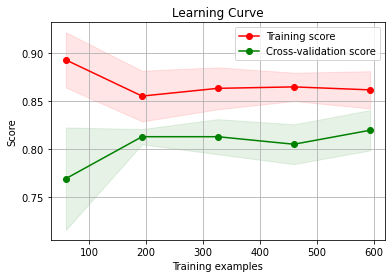

In [ ]:
plot_learning_curve(model, X_train, y_train, cv=3, random_state=0, shuffle=True);
cross_val_score(ctb.CatBoostClassifier(random_state=0), X_train, y_train, scoring='accuracy', cv=3).mean()